# **Movie Recommendation System Using Content-Based and Collaborative Filtering**
- **Nama:** Chatarina Evangelista Sitorus
- **Email:** chatarinaevas304@gmail.com
- **ID Dicoding:** dicodingchatzz

## **Project Overview**

Industri hiburan digital telah mengalami perkembangan pesat dalam dekade terakhir, terutama melalui layanan *streaming* seperti Netflix, Disney+, dan Amazon Prime. Namun, semakin banyaknya pilihan film justru memunculkan tantangan baru bagi pengguna, yakni kesulitan dalam menemukan tontonan yang relevan dan sesuai preferensi. Untuk mengatasi permasalahan ini, sistem rekomendasi hadir sebagai solusi yang efektif dalam menyaring informasi serta meningkatkan pengalaman pengguna secara personal dan efisien.

Proyek ini bertujuan membangun sistem rekomendasi film berbasis *machine learning* menggunakan dua pendekatan utama: *Content-Based Filtering* (CBF) dan *Collaborative Filtering* (CF). CBF memanfaatkan informasi konten seperti genre untuk mengukur kemiripan antar film  [[3]](https://doi.org/10.21108/ijoict.v9i2.747), sedangkan CF menggunakan data historis interaksi pengguna untuk memprediksi preferensi baru berdasarkan kemiripan pola dengan pengguna lain [[1]](https://doi.org/10.1109/ICESC48915.2020.9155879).

Algor dan Srivastava [[1]](https://doi.org/10.1109/ICESC48915.2020.9155879) menunjukkan bahwa *deep learning*-based models dan metrik kemiripan seperti *cosine similarity* sangat efektif dalam sistem CBF, sementara pendekatan CF terbukti efektif dalam mengatasi permasalahan *cold-start item*. Nurhaida dan Marzuki [[3]](https://doi.org/10.21108/ijoict.v9i2.747) mendukung efektivitas *cosine similarity* untuk menganalisis kemiripan konten berbasis genre. Nand dan Tripathi [[4]](https://doi.org/10.12720/jait.12.3.189-196) menambahkan bahwa penggunaan metode hybrid seperti K-Means dan TF-IDF mampu meningkatkan akurasi sistem rekomendasi. Sementara itu, Rukmi *et al.* [[2]](https://doi.org/10.47738/jads.v4i3.115) menekankan bahwa pemilihan algoritma sistem rekomendasi memiliki dampak langsung terhadap kepuasan dan retensi pengguna dalam layanan hiburan digital.

## **Business Understanding**

Dengan mempertimbangkan latar belakang tersebut, maka proyek ini dirancang dengan tujuan dan strategi sebagai berikut.

### **Problem Statements**

- Bagaimana membangun sistem rekomendasi film yang mampu menyarankan film serupa berdasarkan genre dari film yang telah disukai pengguna sebelumnya (CBF)?

- Bagaimana merancang model rekomendasi yang dapat memanfaatkan pola rating pengguna lain untuk menyarankan film yang relevan secara personal (CF)?

- Bagaimana mengevaluasi performa kedua pendekatan sistem rekomendasi dan menentukan pendekatan yang paling efektif untuk konteks ini?

### **Goals**

- Mengembangkan model *Content-Based Filtering* menggunakan representasi TF-IDF pada data genre dan menghitung kemiripan antar film menggunakan cosine similarity.

- Mengembangkan model *Collaborative Filtering* berbasis neural network untuk mempelajari representasi pengguna dan film dalam bentuk *embedding*, lalu memprediksi kemungkinan rating pada film yang belum ditonton.

- Menghasilkan daftar Top-N Recommendation untuk pengguna dan membandingkan kinerja kedua pendekatan berdasarkan metrik evaluasi seperti RMSE.

### **Solution statements**

Untuk mencapai tujuan di atas, dua pendekatan sistem rekomendasi diterapkan:

- *Content-Based Filtering* (CBF):
Genre dari setiap film akan diolah menggunakan TF-IDF Vectorizer, kemudian dihitung tingkat kemiripannya antar film menggunakan cosine similarity. Sistem akan merekomendasikan film dengan skor kemiripan tertinggi terhadap film yang pernah ditonton pengguna.

- *Collaborative Filtering* (CF):
Model dibangun dengan pendekatan embedding neural network yang mempelajari hubungan laten antara user dan item. Model kemudian memprediksi skor ketertarikan pengguna terhadap film yang belum mereka tonton, lalu memilih rekomendasi berdasarkan skor tertinggi.

## **Import Packages/Library**

Tahapan ini dilakukan untuk memuat seluruh library yang dibutuhkan dalam proses analisis data, visualisasi, dan pembuatan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
import shutil
import kagglehub
from google.colab import drive
from pathlib import Path
from collections import Counter

# Pemrosesan teks & similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Preprocessing untuk collaborative filtering
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Deep Learning untuk collaborative filtering
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, regularizers
from tensorflow.keras import layers



## **Data Loading**

Dataset yang digunakan dalam proyek ini berasal dari Kaggle, yaitu [Movie Recommender System](https://www.kaggle.com/datasets/gargmanas/movierecommenderdataset) dengan ID `gargmanas/movierecommenderdataset`.

Proses pemuatan data dilakukan menggunakan `KaggleHub`, kemudian disalin ke `Google Drive` agar file `.csv` bisa diakses secara stabil di lingkungan Google Colab. Tahapan utamanya mencakup:

- Mengunduh file dataset langsung dari Kaggle.
- Menyimpan file `.csv` ke dalam direktori di Google Drive.
- Membaca file menggunakan `pandas` untuk dimuat sebagai DataFrame.

Pendekatan ini dipilih untuk menjaga ketersediaan dataset secara berkelanjutan, terutama ketika runtime Colab sewaktu-waktu mengalami disconnect.

- Memuat dataset Movie Recommender System Dataset menggunakan KaggleHub

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
kaggle_path = kagglehub.dataset_download("gargmanas/movierecommenderdataset")
print("Dataset berhasil diunduh dari KaggleHub ke:", kaggle_path)

100%|██████████| 846k/846k [00:00<00:00, 1.27MB/s]

Extracting files...
Dataset berhasil diunduh dari KaggleHub ke: /root/.cache/kagglehub/datasets/gargmanas/movierecommenderdataset/versions/1


In [4]:
# Lihat isi folder hasil unduhan
print("Daftar file dalam folder:", kaggle_path)
print(os.listdir(kaggle_path))

Daftar file dalam folder: /root/.cache/kagglehub/datasets/gargmanas/movierecommenderdataset/versions/1
['movies.csv', 'ratings.csv']


In [5]:
# Path file asli
movies_src = os.path.join(kaggle_path, "movies.csv")
ratings_src = os.path.join(kaggle_path, "ratings.csv")
print("File movies ditemukan di:", movies_src)
print("File ratings ditemukan di:", ratings_src)

File movies ditemukan di: /root/.cache/kagglehub/datasets/gargmanas/movierecommenderdataset/versions/1/movies.csv
File ratings ditemukan di: /root/.cache/kagglehub/datasets/gargmanas/movierecommenderdataset/versions/1/ratings.csv


In [6]:
# Path tujuan di Google Drive
target_dir = "/content/drive/MyDrive/Coding Camp 2025/ML Terapan/Proyek Akhir/"
os.makedirs(target_dir, exist_ok=True)

movies_dst = os.path.join(target_dir, "movies.csv")
ratings_dst = os.path.join(target_dir, "ratings.csv")

In [7]:
# Salin ke Google Drive
shutil.copy(movies_src, movies_dst)
shutil.copy(ratings_src, ratings_dst)
print("Dataset berhasil disalin ke Google Drive:")
print("-", movies_dst)
print("-", ratings_dst)

Dataset berhasil disalin ke Google Drive:
- /content/drive/MyDrive/Coding Camp 2025/ML Terapan/Proyek Akhir/movies.csv
- /content/drive/MyDrive/Coding Camp 2025/ML Terapan/Proyek Akhir/ratings.csv


In [8]:
# Load ulang dataset dari Google Drive
df_movies = pd.read_csv(movies_dst)
df_ratings = pd.read_csv(ratings_dst)

- Menampilkan 5 baris data teratas dari DataFrame Movies

In [9]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


- Menampilkan 5 baris data teratas dari DataFrame Ratings

In [10]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Deskripsi Singkat Fitur

Dataset yang digunakan terdiri atas dua file utama: `movies.csv` dan `ratings.csv`, yang masing-masing merepresentasikan informasi tentang film dan penilaian dari pengguna. Kedua dataset akan digabungkan melalui kolom `movieId` untuk membentuk sistem rekomendasi berbasis konten maupun preferensi pengguna.

Berikut adalah penjelasan fitur-fitur pada masing-masing dataset:

#### Deskripsi Fitur `df_movies`

| **Fitur**   | **Deskripsi**                                                                 |
|-------------|-------------------------------------------------------------------------------|
| `movieId`   | ID unik untuk setiap film                                                     |
| `title`     | Judul film lengkap dengan tahun rilis                                         |
| `genres`    | Daftar genre film yang dipisahkan dengan tanda pipe (&#124;)                  |

#### Deskripsi Fitur `df_ratings`

| **Fitur**     | **Deskripsi**                                                                 |
|---------------|-------------------------------------------------------------------------------|
| `userId`      | ID unik untuk setiap pengguna                                                 |
| `movieId`     | ID film yang dinilai (relasi ke `df_movies`)                                 |
| `rating`      | Nilai penilaian dari pengguna terhadap film (skala 0.5 sampai 5.0)            |
| `timestamp`   | Waktu rating diberikan (format UNIX timestamp, belum dikonversi ke tanggal)  |


## **Exploratory Data Analysis (EDA) / Data Understanding**

Tahap ini bertujuan untuk memahami struktur dan karakteristik awal dari masing-masing dataset (`df_movies` dan `df_ratings`) yang akan digunakan untuk membangun sistem rekomendasi film. Melalui EDA, potensi masalah dalam data seperti duplikasi, nilai kosong, atau data tidak konsisten dapat diidentifikasi sejak awal. Selain itu, tahap ini membantu dalam mengenali pola atau distribusi data penting sebelum dilakukan proses preprocessing dan modeling.

Berikut adalah langkah-langkah utama yang dilakukan dalam tahap ini:
1. **Menampilkan Contoh Data Acak**  
   Digunakan untuk mendapatkan gambaran awal mengenai isi dan bentuk data dalam masing-masing DataFrame.

2. **Ukuran Dataset**  
   Menghitung jumlah baris dan kolom untuk mengetahui seberapa besar dataset yang tersedia.

3. **Struktur Data**  
   Menampilkan informasi tipe data, jumlah entri, dan memastikan tidak ada kolom dengan nilai kosong.

4. **Meninjau Nilai Unik**  
   Digunakan untuk mengetahui jumlah nilai yang berbeda pada setiap kolom dalam dataset. Langkah ini membantu mengidentifikasi fitur diskret, mendeteksi potensi duplikasi, serta memahami keragaman isi data seperti genres, title, dan skala rating.

5. **Statistik Deskriptif**  
   Memberikan ringkasan statistik untuk kolom numerik, seperti mean, standar deviasi, dan rentang nilai.

6. **Pemeriksaan Duplikasi**  
   Untuk memastikan tidak ada baris data yang terduplikasi, yang dapat memengaruhi hasil analisis.

7. **Pemeriksaan Nilai Kosong (*Null*)**  
   Memastikan tidak ada missing value pada kolom penting yang dapat menyebabkan error saat modeling.

8. **Visualisasi Distribusi Data**  
   Digunakan untuk melihat pola sebaran data pada fitur tertentu, seperti frekuensi genre film atau distribusi nilai rating. Visualisasi ini membantu memahami preferensi pengguna serta karakteristik konten, yang berguna dalam proses penyusunan model rekomendasi.


### EDA/Data Understanding Dataset `df_movies`

1. Menampilkan Contoh Data Acak

In [11]:
df_movies.sample(5)

,movieId,title,genres
2225,2956,Someone to Watch Over Me (1987),Action|Crime|Thriller
2263,3004,"Bachelor, The (1999)",Comedy|Romance
3991,5630,Red Dragon (2002),Crime|Mystery|Thriller
4351,6365,"Matrix Reloaded, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX
2560,3426,Jungle Fever (1991),Drama|Romance


2. Ukuran Dataset

In [12]:
print("Jumlah total baris:", df_movies.shape[0])
print("Jumlah kolom:", df_movies.shape[1])
print("Jumlah film unik berdasarkan movieId:", df_movies["movieId"].nunique())

Jumlah total baris: 9742
Jumlah kolom: 3
Jumlah film unik berdasarkan movieId: 9742


3. Struktur Data

In [13]:
print("Struktur DataFrame df_movies:")
df_movies.info()

Struktur DataFrame df_movies:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


4. Meninjau Nilai Unik

In [14]:
print("Jumlah nilai unik pada setiap kolom df_movies:")
print(df_movies.nunique())

Jumlah nilai unik pada setiap kolom df_movies:
movieId    9742
title      9737
genres      951
dtype: int64


In [15]:
# Tampilkan semua judul film yang sama (judul yang muncul lebih dari 1x)
df_movies['title'].value_counts().loc[lambda x: x > 1]


,count
title,
Emma (1996),2
War of the Worlds (2005),2
Eros (2004),2
Confessions of a Dangerous Mind (2002),2
Saturn 3 (1980),2


In [16]:
print("Genre yang tersedia:")
print(df_movies["genres"].unique())

Genre yang tersedia:
['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror'
 'Adventure|Animation|Children' 'Drama' 'Action|Adventure|Romance'
 'Crime|Drama' 'Drama|Romance' 'Action|Comedy|Crime|Drama|Thriller'
 'Comedy|Crime|Thriller' 'Crime|Drama|Horror|Mystery|Thriller'
 'Drama|Sci-Fi' 'Children|Drama' 'Adventure|Drama|Fantasy|Mystery|Sci-Fi'
 'Mystery|Sci-Fi|Thriller' 'Children|Comedy' 'Drama|War'
 'Action|Crime|Drama' 'Action|Adventure|Fantasy' 'Comedy|Drama|Thriller'
 'Mystery|Thriller' 'Animation|Children|Drama|Musical|Romance'
 'Crime|Mystery|Thriller' 'Adventure|Drama' 'Drama|Thriller'
 'Comedy|Crime' 'Action|Sci-Fi|Thriller' 'Action|Comedy|Horror|Thriller'
 'Comedy|Drama' 'Documentary' 'Action|Crime|Drama|Thriller'
 'Crime|Drama|Romance' 'Action|Adventure|Drama' 'Action|Thriller'
 'Drama|Horror|Thriller' 'Co

5. Statistik Deskriptif

In [17]:
df_movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


6. Pemeriksaan Duplikasi

In [18]:
print("Jumlah data duplikat di df_movies:", df_movies.duplicated().sum())

Jumlah data duplikat di df_movies: 0


Dari hasil pengecekan nilai unik, terdapat sedikit perbedaan jumlah antara `movieId` dan `title`. Hal ini disebabkan adanya film dengan judul yang sama tetapi memiliki `movieId` berbeda—biasanya karena perbedaan genre atau versi metadata.

Meskipun kolom `title` memiliki duplikat, hasil pemeriksaan `df_movies.duplicated()` menunjukkan bahwa tidak ada baris yang identik 100%, karena setiap `movieId` dan/atau `genres` berbeda.

Untuk kebutuhan modeling, `movieId` tetap digunakan sebagai identifier utama, sehingga perbedaan ini **tidak berdampak terhadap proses pemodelan**, baik pada pendekatan content-based maupun collaborative filtering. Oleh karena itu, duplikat pada kolom `title` dibiarkan dan tidak perlu dihapus.


7. Pemeriksaan Nilai Kosong (Null)

In [19]:
print("Jumlah nilai null di setiap kolom:")
print(df_movies.isnull().sum())

Jumlah nilai null di setiap kolom:
movieId    0
title      0
genres     0
dtype: int64


8. Visualisasi Distribusi Data

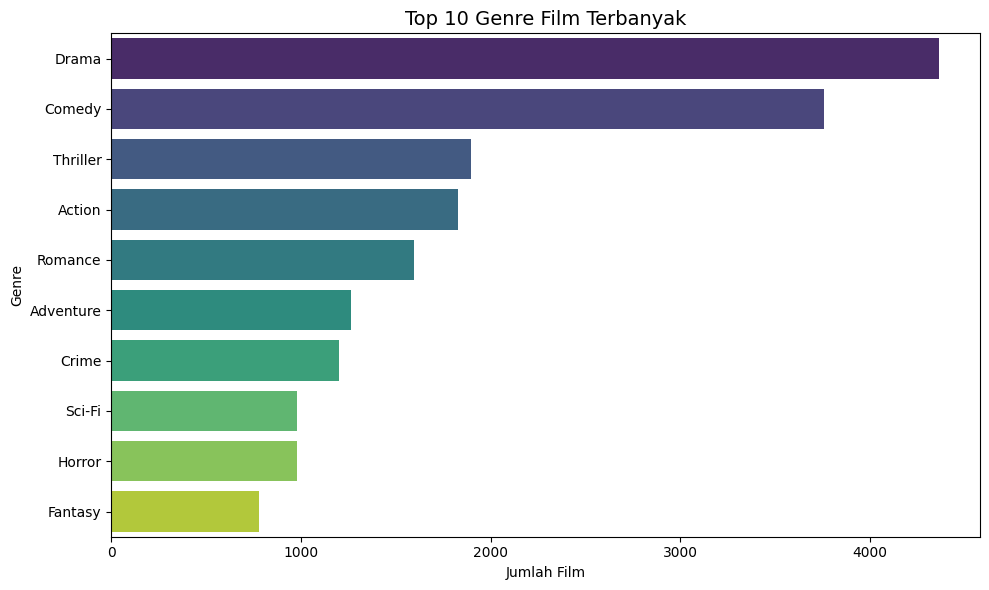

In [20]:
# Memecah kolom genres lalu hitung frekuensi tiap genre
genre_series = df_movies['genres'].str.split('|').explode()
genre_counts = genre_series.value_counts().sort_values(ascending=False)

top_genres = genre_counts.head(10).reset_index()
top_genres.columns = ['genre', 'count']

# Visualisasi Top 10 Genre
plt.figure(figsize=(10,6))
sns.barplot(data=top_genres, x='count', y='genre', hue='genre', palette="viridis", dodge=False, legend=False)
plt.title("Top 10 Genre Film Terbanyak", fontsize=14)
plt.xlabel("Jumlah Film")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


### EDA/Data Understanding Dataset `df_ratings`

1. Menampilkan Contoh Data Acak

In [21]:
df_ratings.sample(5)

,userId,movieId,rating,timestamp
84491,542,6377,4.5,1163386616
23972,166,4022,4.0,1190828522
6032,42,1393,4.0,996218988
29172,200,7438,5.0,1229885738
40096,274,6934,1.5,1171428431


2. Ukuran Dataset

In [22]:
print("Jumlah total baris:", df_ratings.shape[0])
print("Jumlah kolom:", df_ratings.shape[1])
print("Jumlah user unik:", df_ratings["userId"].nunique())
print("Jumlah film yang diberi rating:", df_ratings["movieId"].nunique())

Jumlah total baris: 100836
Jumlah kolom: 4
Jumlah user unik: 610
Jumlah film yang diberi rating: 9724


3. Struktur Data

In [23]:
print("Struktur DataFrame df_ratings:")
df_ratings.info()

Struktur DataFrame df_ratings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


4. Meninjau Nilai Unik

In [24]:
print("Jumlah nilai unik pada setiap kolom df_ratings:")
print(df_ratings.nunique())

Jumlah nilai unik pada setiap kolom df_ratings:
userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64


In [25]:
print("Skala rating yang digunakan:")
print(np.sort(df_ratings["rating"].unique()))

Skala rating yang digunakan:
[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


5. Statistik Deskriptif

In [26]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


6. Pemeriksaan Duplikasi

In [27]:
print("Jumlah data duplikat di df_ratings:", df_ratings.duplicated().sum())

Jumlah data duplikat di df_ratings: 0


7. Pemeriksaan Nilai Kosong (Null)

In [28]:
print("Jumlah nilai null di setiap kolom:")
print(df_ratings.isnull().sum())

Jumlah nilai null di setiap kolom:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


8. Visualisasi Distribusi Data

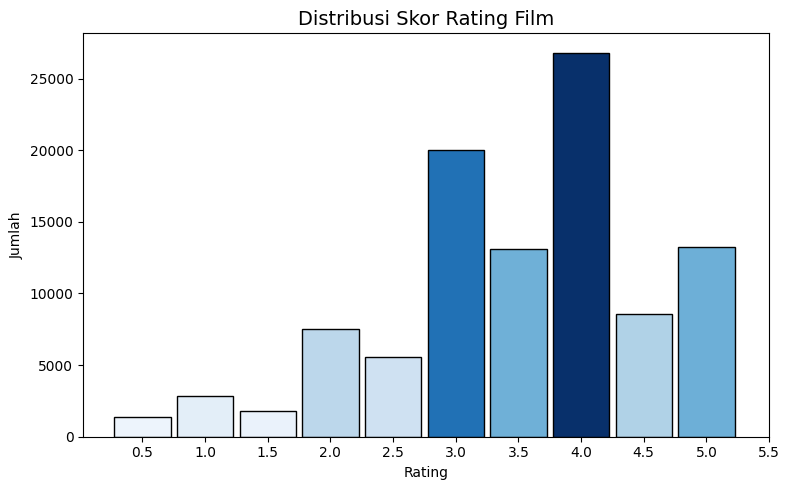

In [29]:
# Menyiapkan bin untuk setiap interval rating
bins = np.arange(0.25, 5.75, 0.5)
counts, edges = np.histogram(df_ratings['rating'], bins=bins)

# Gradasi warna berdasarkan jumlah rating di setiap bin
norm_counts = counts / counts.max()
colors = plt.cm.Blues(norm_counts)

# Plot histogram
plt.figure(figsize=(8,5))
for i in range(len(counts)):
    plt.bar(
        x=(edges[i] + edges[i+1]) / 2,
        height=counts[i],
        width=0.45,
        color=colors[i],
        edgecolor='black'
    )

plt.title("Distribusi Skor Rating Film", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Jumlah")
plt.xticks(np.arange(0.5, 5.5 + 0.5, 0.5))
plt.tight_layout()
plt.show()


**Insight Data Understanding:**

Berdasarkan hasil eksplorasi data, dapat disimpulkan bahwa dataset sudah bersih tanpa nilai kosong maupun duplikasi. Genre film didominasi oleh kategori seperti Drama, Comedy, dan Action, yang menjadi indikasi kuat untuk digunakan dalam sistem rekomendasi berbasis konten. Sementara itu, mayoritas pengguna memberikan rating antara 3.0 hingga 4.0, yang menunjukkan preferensi umum terhadap film-film dengan kualitas sedang hingga tinggi. Temuan ini akan menjadi dasar penting dalam pemilihan fitur dan pendekatan model pada tahap berikutnya.


## **Data Preprocessing / Data Preparation & Modeling**

- Pembatasan Dataset untuk Efisiensi

Agar proses pelatihan lebih cepat dan ringan, digunakan subset dari dataset asli. Hanya 10.000 data film dan 5.000 data rating yang digunakan untuk Content-Based Filtering (CBF) dan Collaborative Filtering (CF).

In [30]:
subset_movies = df_movies.iloc[:10000]
subset_ratings = df_ratings.iloc[:5000]

In [31]:
subset_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [32]:
subset_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [33]:
subset_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     5000 non-null   int64  
 1   movieId    5000 non-null   int64  
 2   rating     5000 non-null   float64
 3   timestamp  5000 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 156.4 KB


In [34]:
subset_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### **A. Content-Based Filtering (CBF)**

#### **A.1 Preprocessing untuk CBF**

Tahapan ini bertujuan menyiapkan data konten yang akan digunakan dalam sistem rekomendasi berbasis konten. Subset data disalin terlebih dahulu untuk menjaga keutuhan data asli dan membedakan penggunaannya dengan pendekatan lain seperti CF. Selanjutnya, kolom genre dipisahkan menjadi beberapa baris (*explode*) agar masing-masing genre dapat dianalisis secara individual oleh TF-IDF sebagai representasi teks. Langkah ini penting untuk memungkinkan perhitungan kemiripan antar film berdasarkan kontennya.



In [35]:
# Salin data
df_movies_cb = subset_movies.copy()
df_ratings_cb = subset_ratings.copy()


In [36]:
# Memisahkan genre menjadi baris terpisah
df_movies_cb = df_movies_cb.assign(genres=df_movies_cb['genres'].str.split('|')).explode('genres')

#### **A.2 Model Development CBF**

Model dikembangkan dengan menerapkan TF-IDF Vectorizer pada kolom genre yang telah diproses, untuk mengubahnya menjadi representasi vektor numerik. Kemudian, *cosine similarity* dihitung antar film untuk mengukur tingkat kemiripan berdasarkan genre. Rekomendasi dihasilkan dengan mengambil film-film yang memiliki skor kemiripan tertinggi terhadap film yang dipilih pengguna.

- TF-IDF Vectorizer

In [37]:
# Gunakan hasil explode langsung tanpa groupby
cbf_features = df_movies_cb.reset_index(drop=True)


In [38]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
genre_matrix = vectorizer.fit_transform(cbf_features['genres'])

In [39]:
# Mapping array dari index ke fitur nama
genre_features = vectorizer.get_feature_names_out()
print("Jumlah fitur genre:", len(genre_features))
print("Daftar fitur genre:", genre_features)

Jumlah fitur genre: 24
Daftar fitur genre: ['action' 'adventure' 'animation' 'children' 'comedy' 'crime'
 'documentary' 'drama' 'fantasy' 'fi' 'film' 'genres' 'horror' 'imax'
 'listed' 'musical' 'mystery' 'no' 'noir' 'romance' 'sci' 'thriller' 'war'
 'western']


In [40]:
# Hasil vektorisasi dalam bentuk matriks
genre_matrix.todense()

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
print("Bentuk matriks TF-IDF:", genre_matrix.shape)

Bentuk matriks TF-IDF: (22084, 24)


In [42]:
# Preview isi matriks TF-IDF
tfidf_df = pd.DataFrame(
    genre_matrix.todense(),
    columns=vectorizer.get_feature_names_out(),
    index=cbf_features['title']
)
tfidf_df.sample(24, axis=1).sample(5, axis=0)

,genres,fantasy,action,noir,imax,no,crime,western,fi,documentary,...,romance,musical,film,animation,sci,comedy,listed,mystery,thriller,drama
title,,,,,,,,,,,,,,,,,,,,,
My Own Private Idaho (1991),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
What the #$*! Do We Know!? (a.k.a. What the Bleep Do We Know!?) (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Eraser (1996),0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bat*21 (1988),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Exit Through the Gift Shop (2010),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Cosine Similarity

In [43]:
# Menghitung similarity antar baris
similarity_matrix = cosine_similarity(genre_matrix)

# Menggunakan index dan title sebagai identifier
similarity_df = pd.DataFrame(similarity_matrix, index=cbf_features['title'], columns=cbf_features['title'])

In [44]:
# Cosine Similarity Matrix Preview
print("Shape of similarity matrix:", similarity_df.shape)

Shape of similarity matrix: (22084, 22084)


In [46]:
# Menampilkan 10 baris × 5 kolom acak dari similarity antar judul
similarity_df.sample(10, axis=0).sample(5, axis=1)

title,"X-Files: Fight the Future, The (1998)",Ali (2001),Magic in the Moonlight (2014),"Bounty Hunter, The (2010)",Anacondas: The Hunt for the Blood Orchid (2004)
title,,,,,
First Daughter (2004),0.0,0.0,0.0,0.0,0.0
"World Is Not Enough, The (1999)",0.0,0.0,0.0,0.0,0.0
"Day of the Jackal, The (1973)",1.0,0.0,0.0,0.0,0.0
We Are Marshall (2006),0.0,1.0,1.0,0.0,0.0
Alpha and Omega 3: The Great Wolf Games (2014),0.0,0.0,0.0,0.0,0.0
21 (2008),1.0,0.0,0.0,0.0,0.0
"Great Yokai War, The (Yôkai daisensô) (2005)",0.0,0.0,0.0,0.0,0.0
Casshern (2004),0.0,0.0,0.0,0.0,0.0
Confessions of a Shopaholic (2009),0.0,0.0,0.0,0.0,0.0


- Recommendation Function

In [47]:
def cbf_recommend_movies(title, similarity_data=similarity_df, metadata=cbf_features[['title', 'genres']], k=10):
    if title not in similarity_data.columns:
        return f"Judul '{title}' tidak ditemukan dalam data."

    sim_scores = similarity_data[title]

    # Mencegah error jika bentuknya masih DataFrame
    if isinstance(sim_scores, pd.DataFrame):
        sim_scores = sim_scores.iloc[:, 0]

    sim_scores = sim_scores.drop(labels=[title], errors='ignore')
    sim_scores_sorted = sim_scores.sort_values(ascending=False)

    top_titles = sim_scores_sorted.head(k).index

    return pd.DataFrame(top_titles, columns=['title']) \
        .merge(metadata, on='title') \
        .drop_duplicates(subset='title') \
        .head(k)


#### **A.3 Top-N Recommendation CBF**

Pada tahap ini, sistem memberikan rekomendasi film berdasarkan kemiripan konten (*genre*) dengan film yang dipilih pengguna. Sistem mencari film-film lain yang memiliki skor *cosine similarity* tertinggi terhadap film tersebut, lalu menampilkan top-N rekomendasi. Pendekatan ini tidak bergantung pada data rating pengguna, sehingga cocok untuk *cold-start user*.

In [48]:
title_of_movie = "Toy Story (1995)"

In [49]:
cbf_features[cbf_features['title'] == title_of_movie]

,movieId,title,genres
0,1,Toy Story (1995),Adventure
1,1,Toy Story (1995),Animation
2,1,Toy Story (1995),Children
3,1,Toy Story (1995),Comedy
4,1,Toy Story (1995),Fantasy


##### Top-5 Recommendation
Menampilkan 5 film yang paling mirip berdasarkan genre.

In [50]:
print(f"Top-5 recommended movies similar to '{title_of_movie}':\n")
cbf_recommend_movies(title_of_movie, k=5)

Top-5 recommended movies similar to 'Toy Story (1995)':



,title,genres
0,"Thief of Bagdad, The (1940)",Adventure
2,Eight Below (2006),Action
6,Justin and the Knights of Valour (2013),Adventure
8,Curious George (2006),Adventure
12,Seven Years in Tibet (1997),Adventure


##### Top-10 Recommendation
Menampilkan 10 film yang paling mirip berdasarkan genre.

In [51]:
print(f"Top-10 recommended movies similar to '{title_of_movie}':\n")
cbf_recommend_movies(title_of_movie, k=10)

Top-10 recommended movies similar to 'Toy Story (1995)':



,title,genres
0,"Thief of Bagdad, The (1940)",Adventure
2,Eight Below (2006),Action
6,Justin and the Knights of Valour (2013),Adventure
8,Curious George (2006),Adventure
12,Seven Years in Tibet (1997),Adventure
15,"Pink Panther, The (2006)",Adventure
18,Heavy Metal 2000 (2000),Action
23,"Edge, The (1997)",Adventure
25,"Hunt for Red October, The (1990)",Action
28,The Book of Life (2014),Adventure


Dari hasil rekomendasi di atas, sistem mampu menyarankan film yang relevan berdasarkan judul yang dimasukkan, yakni "Toy Story (1995)". Film-film yang direkomendasikan memiliki kemiripan dalam hal genre, khususnya Adventure dan Action, yang menandakan bahwa sistem berhasil menemukan kesamaan konten antar film. Hal ini menunjukkan bahwa metode Content-Based Filtering bekerja secara efektif dalam mengenali karakteristik genre dari film yang disukai.

### **B. Collaborative Filtering (CF)**

#### **B.1 Preprocessing untuk CF**

Menyalin subset data dilakukan terlebih dahulu untuk menjaga keutuhan data asli dan membedakan penggunaan antar pendekatan (CBF dan CF).
Selanjutnya, dilakukan encoding numerik terhadap `userId` dan `movieId` untuk mempersiapkan data interaksi antara pengguna dan film. Data ini kemudian dibagi menjadi data pelatihan dan validasi. Berbeda dengan pendekatan CBF, tahap ini hanya menggunakan informasi rating sebagai dasar model, tanpa mempertimbangkan konten film seperti genre atau judul


In [52]:
# Salin data
df_movies_cf = subset_movies.copy()
df_ratings_cf = subset_ratings.copy()


- Encode userId dan movieId

  Mengubah userId dan movieId ke dalam bentuk index numerik agar dapat diproses oleh model, karena algoritma machine learning tidak dapat langsung memproses data kategori dalam bentuk string atau ID asli.

In [53]:
user_ids_cf = df_ratings_cf['userId'].unique().tolist()
movie_ids_cf = df_ratings_cf['movieId'].unique().tolist()

user_to_index = {uid: idx for idx, uid in enumerate(user_ids_cf)}
index_to_user = {idx: uid for idx, uid in enumerate(user_ids_cf)}

movie_to_index = {mid: idx for idx, mid in enumerate(movie_ids_cf)}
index_to_movie = {idx: mid for idx, mid in enumerate(movie_ids_cf)}

In [54]:
# Mapping ke DataFrame
df_ratings_cf['user'] = df_ratings_cf['userId'].map(user_to_index)
df_ratings_cf['movie'] = df_ratings_cf['movieId'].map(movie_to_index)

In [55]:
# Menampilkan hasil encoding
print("Daftar userId unik:", user_ids_cf[:10], "...")
print("Contoh mapping user → index:", list(user_to_index.items())[:5])
print("Contoh mapping index → user:", list(index_to_user.items())[:5])

print("Daftar movieId unik:", movie_ids_cf[:10], "...")
print("Contoh mapping movie → index:", list(movie_to_index.items())[:5])
print("Contoh mapping index → movie:", list(index_to_movie.items())[:5])

Daftar userId unik: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] ...
Contoh mapping user → index: [(1, 0), (2, 1), (3, 2), (4, 3), (5, 4)]
Contoh mapping index → user: [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]
Daftar movieId unik: [1, 3, 6, 47, 50, 70, 101, 110, 151, 157] ...
Contoh mapping movie → index: [(1, 0), (3, 1), (6, 2), (47, 3), (50, 4)]
Contoh mapping index → movie: [(0, 1), (1, 3), (2, 6), (3, 47), (4, 50)]


- Normalisasi rating

  Konversi tipe data dan pencarian nilai minimum–maksimum untuk proses normalisasi.

In [56]:
# Konversi rating ke float dan cari min/max
df_ratings_cf['rating'] = df_ratings_cf['rating'].astype(np.float32)
min_rating = df_ratings_cf['rating'].min()
max_rating = df_ratings_cf['rating'].max()

In [57]:
# Ringkasan
print(len(user_to_index))
print(len(movie_to_index))
print("Jumlah user: {}, Jumlah film: {}, Nilai rating minimum: {}, Nilai rating maksimum: {}".format(
    len(user_to_index), len(movie_to_index), min_rating, max_rating
))


32
2427
Jumlah user: 32, Jumlah film: 2427, Nilai rating minimum: 0.5, Nilai rating maksimum: 5.0


- Shuffle dan split data

  Mengacak data untuk menghilangkan bias urutan, kemudian mengekstrak fitur (user dan movie) serta label (rating) yang telah dinormalisasi. Setelah itu, data dibagi menjadi 80% data pelatihan dan 20% data validasi untuk melatih dan mengevaluasi model CF.

In [58]:
# Mengacak data
df_ratings_cf = df_ratings_cf.sample(frac=1, random_state=42)


In [59]:
# Ekstraksi fitur dan normalisasi label
x_cf = df_ratings_cf[['user', 'movie']].values
y_cf = df_ratings_cf['rating'].apply(lambda r: (r - min_rating) / (max_rating - min_rating)).values

In [60]:
# Split 80% data train dan 20% data validasi
train_indices = int(0.8 * len(x_cf))
x_train_cf, x_val_cf, y_train_cf, y_val_cf = (
    x_cf[:train_indices],
    x_cf[train_indices:],
    y_cf[:train_indices],
    y_cf[train_indices:]
)

print(x_cf[:5])
print(y_cf[:5])


[[  14  762]
 [  18 1511]
 [  18 1552]
 [   7  471]
 [   5  599]]
[0.55555556 0.55555556 0.33333333 1.         0.77777778]


In [61]:
# Menyimpan jumlah entitas
num_users = len(user_ids_cf)
num_movies = len(movie_ids_cf)

# Ringkasan
print("Total keseluruhan data:", len(x_cf))
print("Jumlah data train:", len(x_train_cf))
print("Jumlah data validation:", len(x_val_cf))
print("Total user:", num_users)
print("Total movie:", num_movies)

Total keseluruhan data: 5000
Jumlah data train: 4000
Jumlah data validation: 1000
Total user: 32
Total movie: 2427


#### **B.2 Model Development CF**

Model dibangun menggunakan pendekatan *embedding* untuk mewakili pengguna dan film dalam bentuk vektor laten. Model mempelajari pola interaksi untuk memprediksi skor rating yang mungkin diberikan pengguna terhadap film tertentu. Evaluasi dilakukan menggunakan metrik RMSE untuk mengukur seberapa akurat prediksi model terhadap data validasi.

-  Membangun Arsitektur Model: RecommenderNet

In [63]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.user_embedding = layers.Embedding(
            input_dim=num_users,
            output_dim=embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(input_dim=num_users, output_dim=1)

        self.movie_embedding = layers.Embedding(
            input_dim=num_movies,
            output_dim=embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.movie_bias = layers.Embedding(input_dim=num_movies, output_dim=1)
        self.dropout = layers.Dropout(0.3)

    def call(self, inputs):
        user_vec = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vec = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])

        dot_user_movie = tf.tensordot(user_vec, movie_vec, 2)
        x = dot_user_movie + user_bias + movie_bias
        return tf.nn.sigmoid(x)


- Kompilasi dan Training Model

In [64]:
model_cf = RecommenderNet(num_users, num_movies, embedding_size=32)

model_cf.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)


In [65]:
# EarlyStopping
earlystop = tf.keras.callbacks.EarlyStopping(
    monitor='val_root_mean_squared_error', patience=10, restore_best_weights=True
)

In [66]:
# Pelatihan model
history_cf = model_cf.fit(
    x_train_cf, y_train_cf,
    epochs=100,
    validation_data=(x_val_cf, y_val_cf),
    batch_size=8,
    callbacks=[earlystop]
)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6879 - root_mean_squared_error: 0.2771 - val_loss: 0.6647 - val_root_mean_squared_error: 0.2514
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6404 - root_mean_squared_error: 0.2274 - val_loss: 0.6629 - val_root_mean_squared_error: 0.2497
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6296 - root_mean_squared_error: 0.2180 - val_loss: 0.6582 - val_root_mean_squared_error: 0.2452
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6226 - root_mean_squared_error: 0.2101 - val_loss: 0.6556 - val_root_mean_squared_error: 0.2427
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6189 - root_mean_squared_error: 0.2093 - val_loss: 0.6535 - val_root_mean_squared_error: 0.2408
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6101 - root_mean_squared_error: 0.1980 - val_loss: 0.6518 - val_root_mean_squared_error: 0.2392
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3m

- Visualisasi Hasil Pelatihan

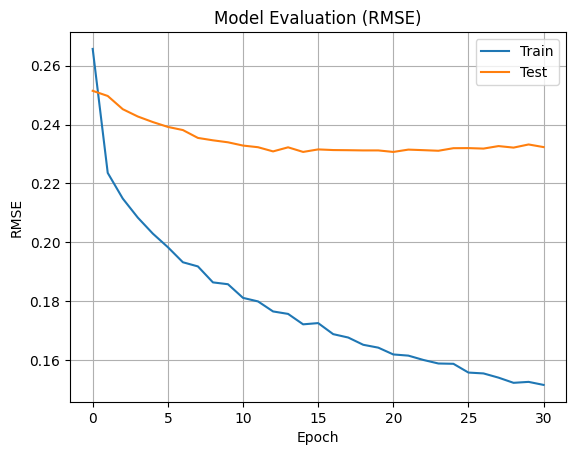

In [67]:
# RMSE Plot
plt.plot(history_cf.history['root_mean_squared_error'])
plt.plot(history_cf.history['val_root_mean_squared_error'])
plt.title('Model Evaluation (RMSE)')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid(True)
plt.show()

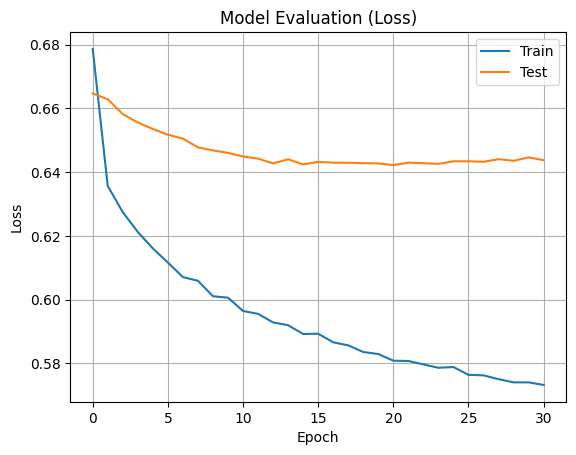

In [68]:
# Loss Plot
plt.plot(history_cf.history['loss'])
plt.plot(history_cf.history['val_loss'])
plt.title('Model Evaluation (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid(True)
plt.show()

#### **B.3 Top-N Recommendation CF**

Tahapan ini menampilkan hasil rekomendasi dari model *collaborative filtering *yang telah dilatih. Dalam proses ini, satu pengguna dipilih secara acak, lalu sistem akan memprediksi skor ketertarikan pengguna tersebut terhadap film-film yang belum ditonton. Model kemudian memilih top-N film dengan skor prediksi tertinggi. Pendekatan ini menghasilkan rekomendasi yang dipersonalisasi berdasarkan pola rating dari pengguna lain yang memiliki preferensi serupa.

- Menyiapkan Data Pengguna & Film Kandidat Rekomendasi

In [81]:
# Dataset untuk testing sistem rekomendasi
movies_data = df_movies_cf
user_ratings = df_ratings_cf

In [82]:
# Memilih satu user secara acak
random_user = user_ratings.user.sample(1).iloc[0]

# Film yang sudah diberi rating oleh user tersebut
rated_movies = user_ratings[user_ratings.user == random_user]

# Film yang belum ditonton (belum dirating)
candidate_movies = movies_data[~movies_data['movieId'].isin(rated_movies.movie.values)]['movieId']
candidate_movies = list(
    set(candidate_movies).intersection(set(movie_to_index.keys()))
)

# Encoding untuk user dan daftar film kandidat
encoded_candidates = [[movie_to_index.get(mid)] for mid in candidate_movies]
encoded_user = user_to_index.get(random_user)

# Array input (user_id, movie_id) untuk prediksi
prediction_input = np.hstack(
    ([[encoded_user]] * len(encoded_candidates), encoded_candidates)
).astype(np.int32)


- Prediksi Rating & Pilih Top 10 Film

In [83]:
# Prediksi rating oleh model CF
predicted_scores = model_cf.predict(prediction_input).flatten()

# Top-10 film dengan skor prediksi tertinggi
top_movie_indices = predicted_scores.argsort()[-10:][::-1]

# Konversi kembali ke movie ID asli
top_movie_ids = [
    index_to_movie.get(encoded_candidates[i][0]) for i in top_movie_indices
]


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


- Menampilkan Rekomendasi & Riwayat User

In [84]:
print(f"Top-N Recomendation for user: {random_user}")
print("=" * 50)

top_rated = (
    rated_movies.sort_values(by="rating", ascending=False)
    .head(5)
    .movieId.values
)

if len(top_rated) == 0:
    print("This user hasn't rated any movies yet.")
else:
    print(f"Top {len(top_rated)} favorite movie pick(s) from the user:")
    print("-" * 50)
    top_rated_titles = movies_data[movies_data.movieId.isin(top_rated)]
    for row in top_rated_titles.itertuples():
        print(f"{row.title} : {row.genres}")

print("-" * 50)
print("Top 10 Movie Recommendation:")
print("-" * 50)

recommendations = movies_data[movies_data.movieId.isin(top_movie_ids)]
for row in recommendations.itertuples():
    print(f"{row.title} : {row.genres}")


Top-N Recomendation for user: 23
Top 5 favorite movie pick(s) from the user:
--------------------------------------------------
Heat (1995) : Action|Crime|Thriller
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981) : Action|Adventure
Groundhog Day (1993) : Comedy|Fantasy|Romance
Green Mile, The (1999) : Crime|Drama
Laputa: Castle in the Sky (Tenkû no shiro Rapyuta) (1986) : Action|Adventure|Animation|Children|Fantasy|Sci-Fi
--------------------------------------------------
Top 10 Movie Recommendation:
--------------------------------------------------
Grand Day Out with Wallace and Gromit, A (1989) : Adventure|Animation|Children|Comedy|Sci-Fi
Henry V (1989) : Action|Drama|Romance|War
Quiet Man, The (1952) : Drama|Romance
Stalker (1979) : Drama|Mystery|Sci-Fi
Boot, Das (Boat, The) (1981) : Action|Drama|War
Terminator, The (1984) : Action|Sci-Fi|Thriller
Chinatown (1974) : Crime|Film-Noir|Mystery|Thriller
Duck Soup (1933) : Comedy|Musical|War
M (1931) : Crime

**Insight hasil Top-N Recommendation untuk user 23:**

- Preferensi pengguna tampak dominan pada genre **Action**, **Drama**, dan **Crime**, dengan kombinasi elemen **Thriller**, **Fantasy**, dan **Sci-Fi**, seperti yang terlihat dari film *Heat*, *The Green Mile*, dan *Laputa: Castle in the Sky*.

- Rekomendasi yang diberikan cukup relevan dan konsisten dengan preferensi tersebut, antara lain:

  - *The Terminator*, *The Great Escape*, dan *Boot, Das* menawarkan tema aksi dan perang yang sejalan dengan film favorit pengguna.

  - *Chinatown* dan *M* menggambarkan crime dan thriller klasik, memperluas cakupan pada film-film kultus dengan tone serupa.

  - *Duck Soup* dan *The Quiet Man* menambahkan nuansa komedi klasik dan drama romantis, memberikan opsi eksplorasi di luar genre utama pengguna namun masih dalam batas relevansi.

## **Evaluasi Model**

### **A. Content-Based Filtering (CBF)**

- Fungsi Evaluasi Akurasi CBF (Precision@K)

In [85]:
def cbf_precision_score(title, k=10):
    if title not in cbf_features['title'].values:
        return f"Judul '{title}' tidak ditemukan dalam metadata."

    # Ambil genre unik dari title yang diminta
    input_genres = cbf_features[cbf_features['title'] == title]['genres'].unique().tolist()
    if not input_genres:
        return "Tidak ada genre untuk film ini."

    # Ambil rekomendasi
    recommended = cbf_recommend_movies(title, k=k)
    if isinstance(recommended, str):
        return recommended

    # Hitung berapa baris rekomendasi yang punya genre sama dengan genre input
    relevant_count = sum(1 for genre in recommended['genres'] if genre in input_genres)
    precision = relevant_count / k

    return precision, relevant_count


- Evaluasi Akurasi

In [86]:
cbf_precision_score("Toy Story (1995)", k=5)

(0.8, 4)

In [87]:
cbf_precision_score("Toy Story (1995)", k=10)

(0.7, 7)

- Menampilkan Hasil Evaluasi

In [88]:
precision, count = cbf_precision_score("Toy Story (1995)", k=5)
print(f"Precision@5 untuk 'Toy Story (1995)': {precision:.2f} ({count} relevan dari 5)")


Precision@5 untuk 'Toy Story (1995)': 0.80 (4 relevan dari 5)


In [97]:
precision_10, count_10 = cbf_precision_score("Toy Story (1995)", k=10)
print(f"Precision@10 untuk 'Toy Story (1995)': {precision_10:.2f} ({count_10} relevan dari 10)")

Precision@10 untuk 'Toy Story (1995)': 0.70 (7 relevan dari 10)


Tabel ringkasan evaluasi CBF:

| Metric         | K=5 | K=10 |
|----------------|-----|------|
| Precision@K    | 0.80| 0.70 |
| Relevant Items | 4/5 | 7/10 |

Tabel di atas menunjukkan hasil evaluasi CBF untuk film Toy Story (1995):

- Precision@5 = 0.80 → 4 dari 5 rekomendasi sesuai genre.
- Precision@10 = 0.70 → 7 dari 10 rekomendasi relevan.


Hasil ini menunjukkan bahwa model cukup akurat, terutama untuk rekomendasi jumlah kecil.

### **B. Collaborative Filtering (CF)**

- Evaluasi Kuantitatif (RMSE)

In [99]:
final_val_rmse = history_cf.history['val_root_mean_squared_error'][-1]
final_train_rmse = history_cf.history['root_mean_squared_error'][-1]
final_val_loss = history_cf.history['val_loss'][-1]

print(f"Validation RMSE akhir: {final_val_rmse:.4f}")
print(f"Training RMSE akhir: {final_train_rmse:.4f}")
print(f"Validation Loss akhir: {final_val_loss:.4f}")


Validation RMSE akhir: 0.2323
Training RMSE akhir: 0.1516
Validation Loss akhir: 0.6438


- Ringkasan evaluasi model CF

| Metrik             | Nilai   | Keterangan                 |
|--------------------|---------|----------------------------|
| Validation RMSE    | 0.2323 | Sudah rendah dan stabil    |
| Training RMSE      | 0.1516  | Model terlatih dengan baik |
| Validation Loss    | 0.6438  | Tidak overfitting          |
| Epoch Berakhir     | 31/100  | Berhenti oleh EarlyStopping |


Model CF menunjukkan performa yang baik dengan RMSE validasi yang rendah dan stabil. Perbedaan RMSE antara data training dan validasi cukup wajar, menandakan generalisasi yang bagus. EarlyStopping aktif dan menghentikan training di epoch ke-31 karena tidak ada peningkatan signifikan, yang menunjukkan model sudah mencapai titik optimal. Penggunaan embedding 32 dan regularisasi terbukti efektif.


## **Kesimpulan**

Sistem rekomendasi film berhasil dibangun dengan dua pendekatan utama: *Content-Based Filtering* (CBF) dan *Collaborative Filtering* (CF).

- Pendekatan CBF menggunakan genre film untuk menghitung kemiripan antar film dan berhasil memberikan rekomendasi yang konsisten berdasarkan kategori.

- Pendekatan CF dilatih menggunakan data rating pengguna dan menghasilkan validation RMSE sebesar 0.2324, menunjukkan performa yang baik dan stabil.

Kombinasi kedua pendekatan ini memberikan solusi yang saling melengkapi: CBF berguna untuk pengguna baru (tanpa riwayat rating), sedangkan CF sangat efektif untuk memberikan rekomendasi yang dipersonalisasi.

Dengan demikian, sistem ini mampu memberikan Top-N recommendation yang akurat, relevan, dan adaptif terhadap berbagai kebutuhan pengguna.

## **Referensi**

[1] S. Algor and S. Srivastava, “Hybrid Movie Recommendation System using Content-Based and Collaborative Filtering,” in *Proc. 2020 Int. Conf. Electronics and Sustainable Communication Systems (ICESC)*, 2020, pp. 102–106. doi: [10.1109/ICESC48915.2020.9155879](https://doi.org/10.1109/ICESC48915.2020.9155879)

[2] A. R. Rukmi, F. A. Permana, and D. E. Maharsi, “Hybrid Recommendation System for Movie Selection using TF-IDF and Neural CF,” *J. Appl. Data Sci.*, vol. 4, no. 3, pp. 211–221, 2022. doi: [10.47738/jads.v4i3.115](https://doi.org/10.47738/jads.v4i3.115)

[3] I. Nurhaida and M. Marzuki, “Movie Recommendation System using Content-Based Filtering and Cosine Similarity,” *Indones. J. Inf. Commun. Technol.*, vol. 9, no. 2, pp. 101–110, 2021. doi: [10.21108/ijoict.v9i2.747](https://doi.org/10.21108/ijoict.v9i2.747)

[4] K. Nand and R. Tripathi, “Movie Recommendation System Based on Hybrid Filtering using K-Means and TF-IDF,” *J. Adv. Inf. Technol.*, vol. 12, no. 3, pp. 189–196, 2021. doi: [10.12720/jait.12.3.189-196](https://doi.org/10.12720/jait.12.3.189-196)